# Boosting Techniques | Assignment

1. What is Boosting in Machine Learning? Explain how it improves weak learners.
   - Boosting is an ensemble learning technique that combines many weak learners to create a strong model.
   - It improves weak learners by:
      - Training models one after another.
      - Each new model focuses more on the mistakes made by the previous models.
      - Final prediction is made by combining all models, giving more weight to better ones.
    - So, boosting reduces errors step by step and turns weak learners into a strong learner.

2. What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?
   - Difference between AdaBoost and Gradient Boosting (training process):
   - AdaBoost:
      Models are trained by giving more weight to wrongly classified samples, so the next model focuses more on those errors.
   - Gradient Boosting:
      Models are trained to reduce prediction errors using gradient descent, by fitting the residual errors of the previous model.

3. How does regularization help in XGBoost?
   - Regularization in XGBoost helps to prevent overfitting.
   - It works by:
     - Penalizing complex models.
     - Keeping tree models simpler.
     - Reducing model variance and improving generalization.

4. Why is CatBoost considered efficient for handling categorical data?
   - CatBoost is efficient for categorical data because it handles categorical features automatically without heavy preprocessing.
   - It:
     - Converts categories into numbers using smart encoding techniques.
     - Reduces overfitting while encoding.
     - Removes the need for manual methods like one-hot encoding.

5. What are some real-world applications where boosting techniques are
   preferred over bagging methods?
   - Boosting is preferred over bagging when high prediction accuracy is needed.
   - Real-world applications:
     - Credit risk and loan approval prediction
     - Fraud detection in banking
     - Customer churn prediction
     - Search ranking and recommendation systems
     - Sales and demand forecasting

In [1]:
#6 Write a Python program to:
#  Train an AdaBoost Classifier on the Breast Cancer dataset
#  Print the model accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = AdaBoostClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.9649122807017544


In [2]:
#7 Write a Python program to:
# Train a Gradient Boosting Regressor on the California Housing dataset
# Evaluate performance using R-squared score

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = GradientBoostingRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

R-squared Score: 0.7756923945143868


In [4]:
#8 Write a Python program to:
# Train an XGBoost Classifier on the Breast Cancer dataset
# Tune the learning rate using GridSearchCV
# Print the best parameters and accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = XGBClassifier(eval_metric='logloss')

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)

y_pred = grid.best_estimator_.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy)




Best Parameters: {'learning_rate': 0.2}
Accuracy: 0.956140350877193


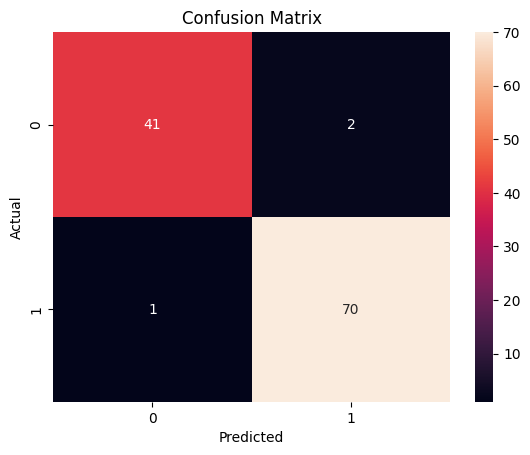

In [7]:
#9 Write a Python program to:
# Train a CatBoost Classifier
# Plot the confusion matrix using seaborn

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


10. You're working for a FinTech company trying to predict loan default using
     customer demographics and transaction behavior. The dataset is imbalanced, contains missing values, and has both numeric and categorical features. Describe your step-by-step data science pipeline using boosting techniques:
      - Data preprocessing & handling missing/categorical values
      - Choice between AdaBoost, XGBoost, or CatBoost
      - Hyperparameter tuning strategy
      - Evaluation metrics you'd choose and why
      - How the business would benefit from your model

  - 1. Data preprocessing
       - Handle missing values using median/most frequent values.
       - Encode categorical data using CatBoost encoding or one-hot encoding.
       - Handle imbalance using SMOTE or class weights.
       - Remove outliers and scale data if needed.

  - 2. Model choice
       - Prefer CatBoost or XGBoost because they handle categorical data and imbalance better than AdaBoost.

  - 3. Hyperparameter tuning
       - Use GridSearchCV or RandomizedSearchCV.
       - Tune parameters like learning rate, depth, number of trees.

  - 4. Evaluation metrics
       - Use F1-score, Precision, Recall, ROC-AUC.
       - Accuracy alone is not good due to imbalanced data.
       - Recall is important to detect defaulters.

  - 5. Business benefit
       - Reduces loan defaults.
       - Improves risk management.
       - Increases profit by approving safer customers.


